# Titanic survival prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.shape


(891, 12)

In [4]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

# Handling Missing values

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [12]:
data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [13]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
# Convert 'gender' to numeric values
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})



In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


# Data Visualization

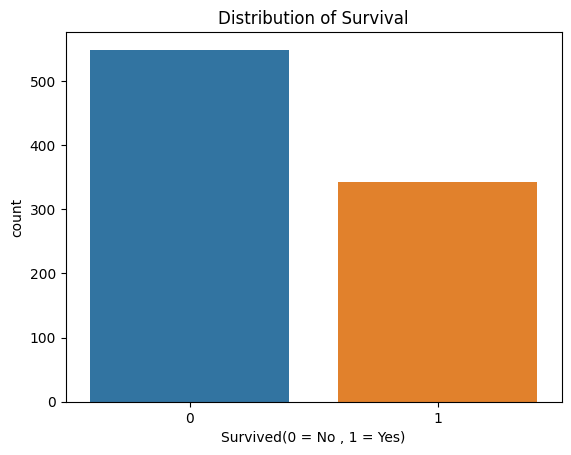

In [20]:
sns.countplot(x='Survived',data=data)
plt.title('Distribution of Survival')
plt.xlabel('Survived(0 = No , 1 = Yes)')
plt.ylabel('count')
plt.show()


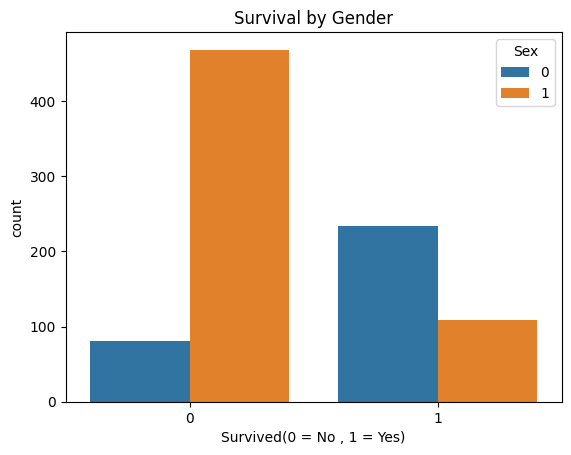

In [21]:
sns.countplot(x='Survived', hue='Sex' , data=data)
plt.title('Survival by Gender')
plt.xlabel('Survived(0 = No , 1 = Yes)')
plt.ylabel('count')
plt.show()


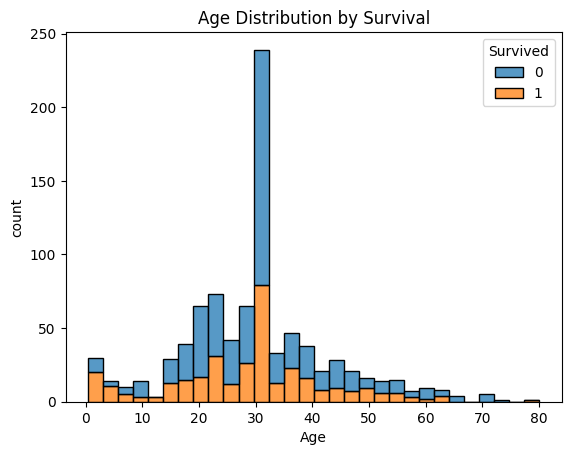

In [22]:
sns.histplot(data=data ,x='Age', hue='Survived', multiple='stack' , kde=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()


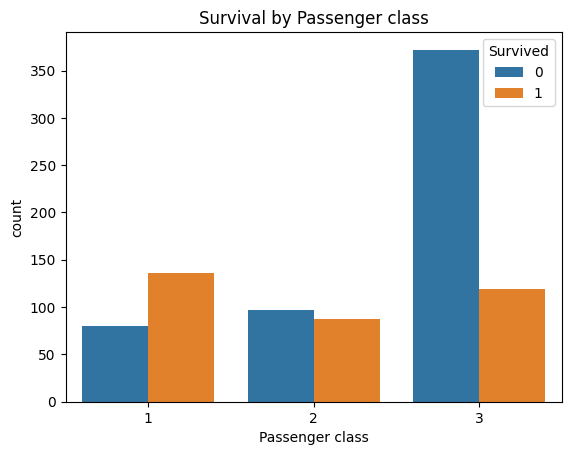

In [23]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived' , data= data)
plt.title('Survival by Passenger class')
plt.xlabel('Passenger class')
plt.ylabel('count')
plt.show()


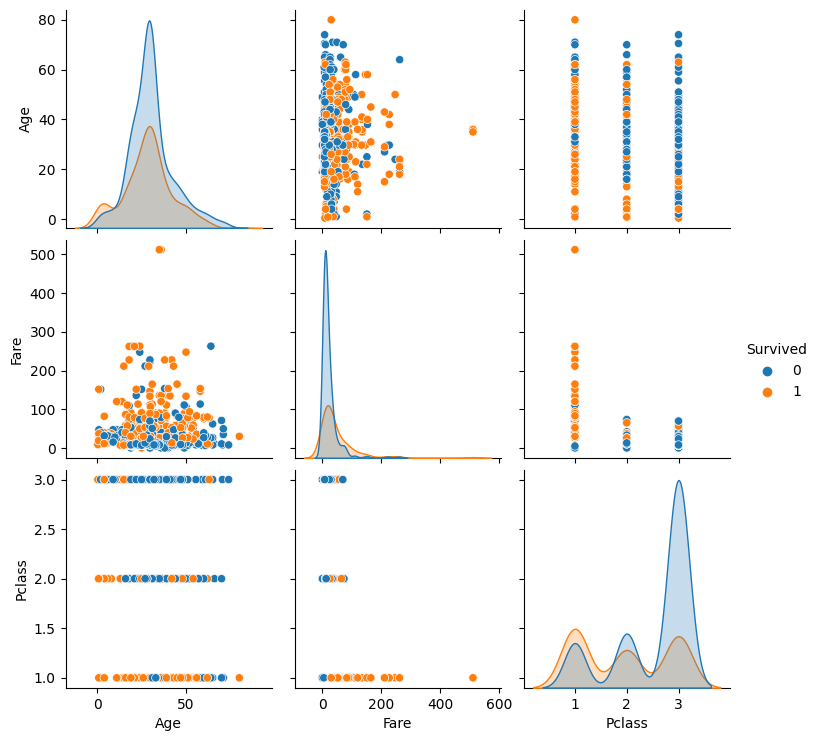

In [24]:
sns.pairplot(data ,hue='Survived',vars=['Age','Fare','Pclass'])
plt.show()

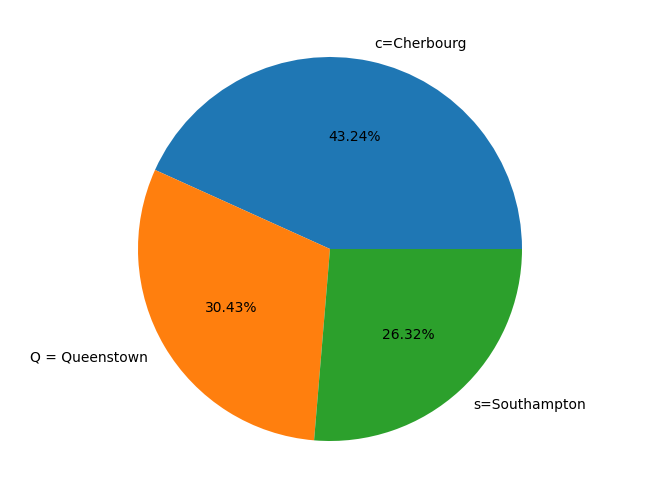

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['c=Cherbourg','Q = Queenstown','s=Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s,labels = l,autopct='%1.2f%%')
plt.show()

In [26]:
pd.pivot_table(data,index="Survived",values=["Age","SibSp","Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


# Feature Engineering

In [27]:
le  = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [28]:
x= data.drop('Survived',axis=1)
y= data['Survived']

In [29]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform (x_test)

# Model Prediction

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = model.predict(x_test)

In [34]:
print(f"Accuracy:  {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy:  0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

